In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
from scipy.interpolate import interp1d
import lmfit as lm
import scipy.cluster.hierarchy as ch

In [2]:
egfp=np.array(pd.read_excel('20170316_K5_gfp_timecorr.xlsx', index_col=None,header=None)).T
time = np.array(egfp[0]/60/60)
egfp = egfp[1:]

In [3]:
def twostage(t,t0,ktl,delta,beta):
    km=np.abs(ktl)
    delta=np.abs(delta)
    beta=np.abs(beta)
    t0=np.abs(t0)
    return (ktl/(delta-beta)*(1-np.exp(-(delta-beta)*(t-t0)))*np.exp(-beta*(t-t0))).clip(0)
twostage_model = lm.Model(twostage)

In [4]:
def threestage(t,t0,ktl,km,delta,beta):
    km=np.abs(km)
    ktl=np.abs(ktl)
    delta=np.abs(delta)
    beta=np.abs(beta)
    dmb = delta-beta
    bkm = beta + km
    dmbk = delta-bkm
    t0=np.abs(t0)
    dt=t-t0
    result = 1/dmb +km*np.exp(-dmb*dt)/dmb/dmbk-np.exp(-km*dt)/dmbk
    result = ktl*np.exp(-beta*dt)*result.clip(0)
    result[t<t0]=0
    return result
threestage_model = lm.Model(threestage)

[[Model]]
    Model(twostage)
[[Fit Statistics]]
    # function evals   = 55
    # data points      = 73
    # variables        = 4
    chi-square         = 191.395
    reduced chi-square = 2.774
    Akaike info crit   = 82.477
    Bayesian info crit = 91.639
[[Variables]]
    t0:      3.71228005 +/- 0.043537 (1.17%) (init= 4)
    ktl:     218.955799 +/- 8.616576 (3.94%) (init= 800)
    delta:   0.02998654 +/- 14.83870 (49484.54%) (init= 0.07)
    beta:    0.03025731 +/- 14.83253 (49021.30%) (init= 0.05)
[[Correlations]] (unreported correlations are <  0.100)
    C(delta, beta)               = -1.000 
    C(t0, ktl)                   =  0.790 
    C(ktl, delta)                =  0.443 
    C(ktl, beta)                 = -0.442 
    C(t0, delta)                 =  0.442 
    C(t0, beta)                  = -0.441 

[[Model]]
    Model(threestage)
[[Fit Statistics]]
    # function evals   = 175
    # data points      = 73
    # variables        = 5
    chi-square         = 171.559
    red

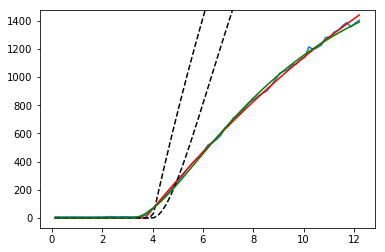

In [5]:
data = egfp[40]
sigma = np.sqrt(data)
result2 = twostage_model.fit(data, t=time, t0=4, ktl=800, delta=0.07, beta=0.05, weights=1/sigma)
result3 = threestage_model.fit(data, t=time, t0=4, ktl=800, km=1,delta=0.07, beta=0.05, weights=1/sigma)
plt.figure()
plt.plot(time,data)
plt.plot(time,result2.init_fit, 'k--')
plt.plot(time, result2.best_fit, 'r-')
plt.plot(time,result3.init_fit, 'k--')
plt.plot(time, result3.best_fit, 'g-')
plt.ylim((-0.05*data.max(),data.max()*1.05))
print(result2.fit_report())
print(result3.fit_report())

In [6]:
# cluster analysis to find the onset for fluorescence
# normalize the data
time_norm=(time-time.min())/50/(time.max()-time.min())
t0cluster_list=[]
for data in egfp:
    data_norm=(data-data.min())/(data.max()-data.min())
    data_diff_norm=np.gradient(data_norm)
    # combine the data
    X = np.vstack((time_norm,data_norm,data_diff_norm)).T
    # generate the linkage matrix
    Z = ch.linkage(X, method='single',metric='cityblock')
    tree = ch.cut_tree(Z, height=0.003).flatten()
    t0cluster_list.append(tree[tree==0].size)
t0cluster_list=np.array(t0cluster_list)
# convert to hours
t0cluster_list=(t0cluster_list)*10/60

data set 0 t0_guess 3.5307471944072115
data set 1 t0_guess 2.641805289993626
data set 2 t0_guess 2.3678659934901614
data set 3 t0_guess 2.784759128104088
data set 4 t0_guess 6.671259289013858
data set 5 t0_guess 3.8017463945944128
data set 6 t0_guess 7.097401718455744
data set 7 t0_guess 3.868109192639479
data set 8 t0_guess 6.420017675823833
data set 9 t0_guess 3.2338651549508692
data set 10 t0_guess 3.6978577244799764
data set 11 t0_guess 3.7448354341736696
data set 12 t0_guess 3.2809533389419268
data set 13 t0_guess 3.940882511764252
data set 14 t0_guess 3.7800552239236382
data set 15 t0_guess 2.6444849975277798
data set 16 t0_guess 8.269697283133361
data set 17 t0_guess 4.092174138895548
data set 18 t0_guess 3.476801808335751
data set 19 t0_guess 3.2759146821381186
data set 20 t0_guess 4.8558687239026375


/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


data set 21 t0_guess 3.287249705535925
data set 22 t0_guess 4.482629661001994
data set 23 t0_guess 4.716878415300546
data set 24 t0_guess 4.24416957098996
data set 25 t0_guess 3.2783333333332236
data set 26 t0_guess 4.79240145681302
data set 27 t0_guess 3.130164119977363
data set 28 t0_guess 4.05596939875009
data set 29 t0_guess 4.861354916067146
data set 30 t0_guess 8.344977780206172
data set 31 t0_guess 2.404581963363081
data set 32 t0_guess 4.918221854130515
data set 33 t0_guess 2.8867312020577836
data set 34 t0_guess 2.366594040824721
data set 35 t0_guess 5.914073182100683
data set 36 t0_guess 2.5822304110716674
data set 37 t0_guess 4.291372849599727
data set 38 t0_guess 4.488163179031917
data set 39 t0_guess 3.5915870578869553
data set 40 t0_guess 3.857110378873772
data set 41 t0_guess 3.8939163123917493
data set 42 t0_guess 2.83867847424544
data set 43 t0_guess 3.0527681660899653
data set 44 t0_guess 6.677200913485938
data set 45 t0_guess 7.243114657210402
data set 46 t0_guess 6.

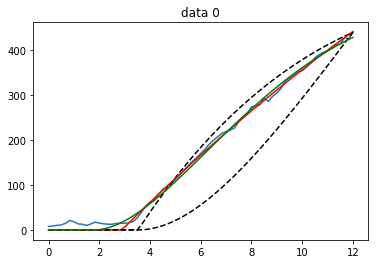

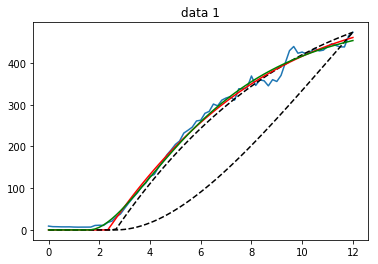

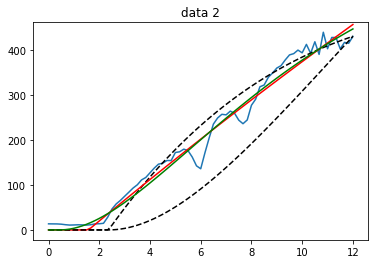

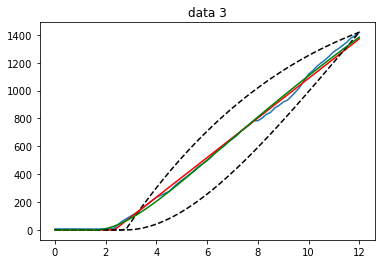

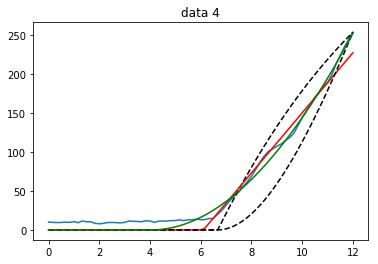

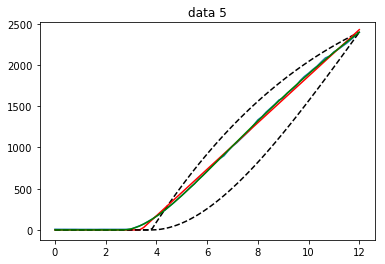

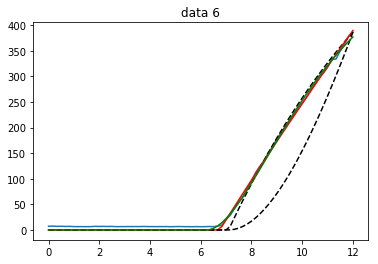

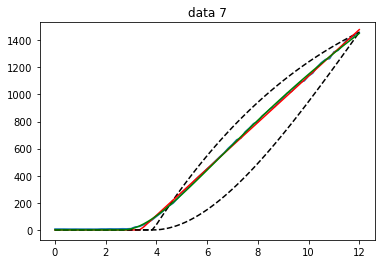

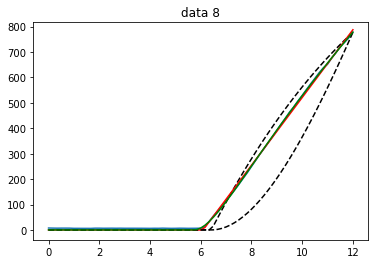

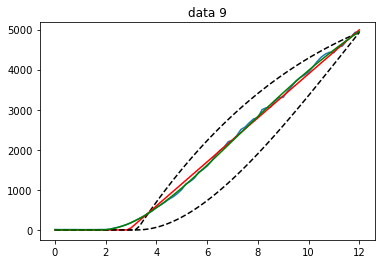

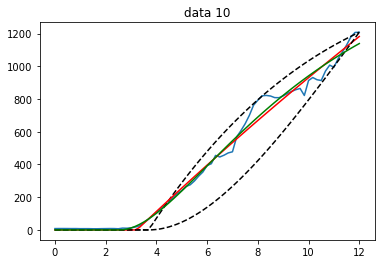

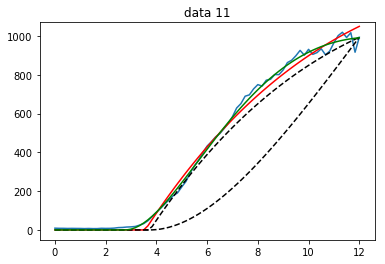

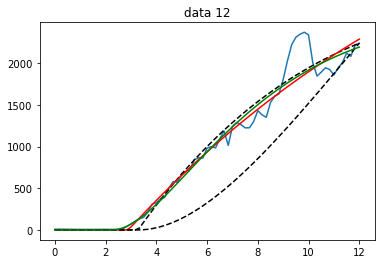

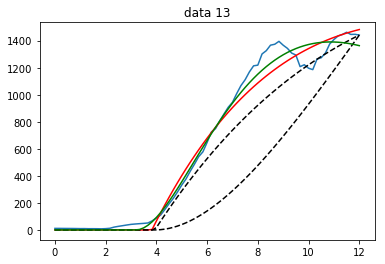

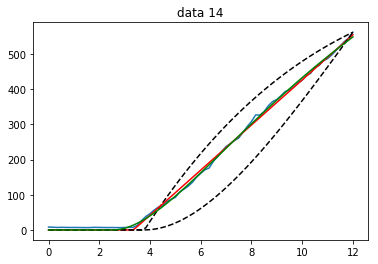

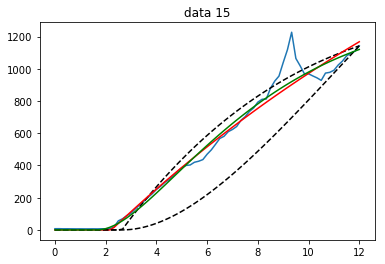

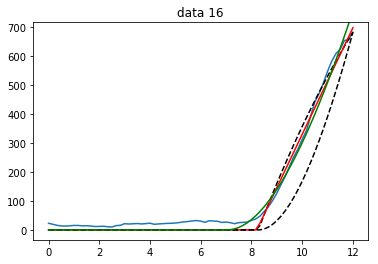

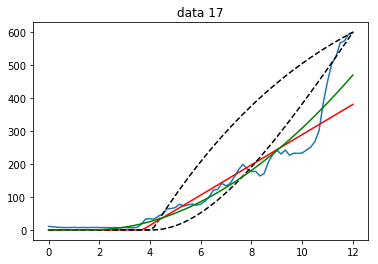

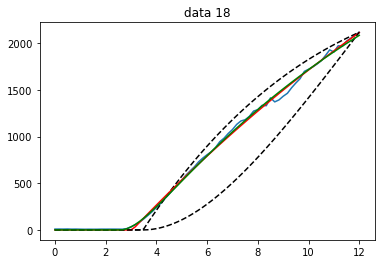

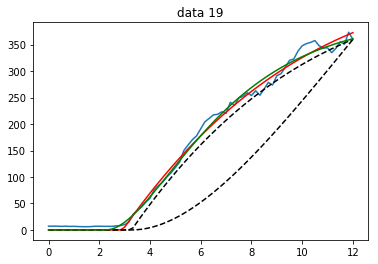

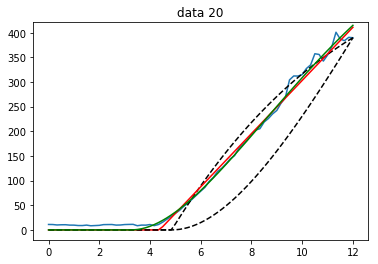

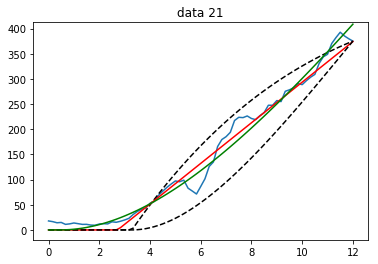

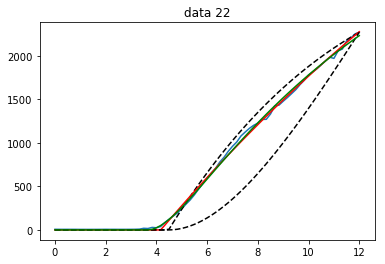

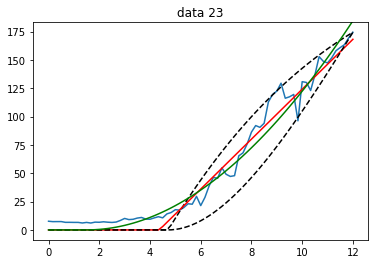

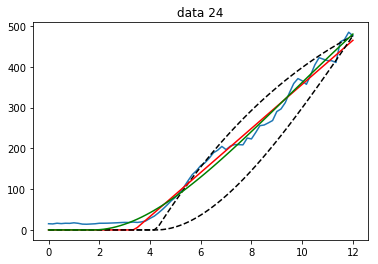

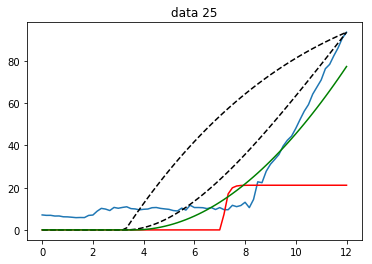

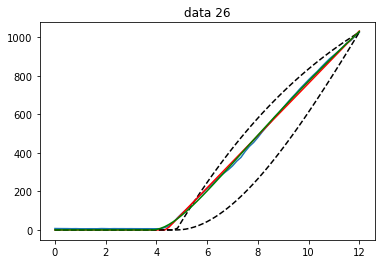

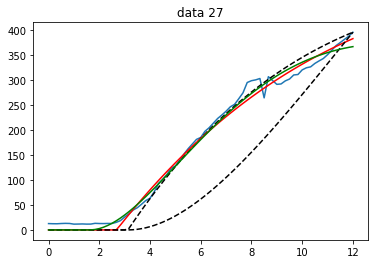

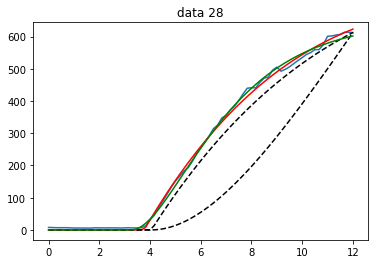

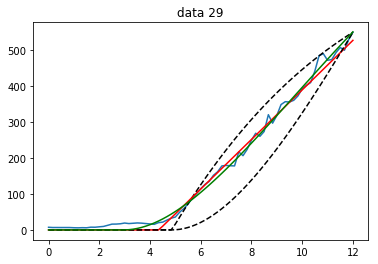

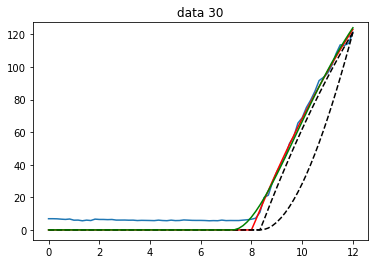

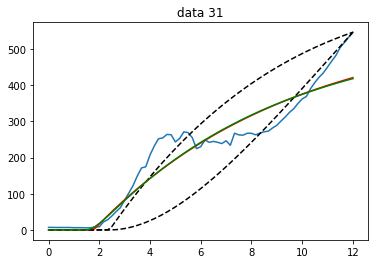

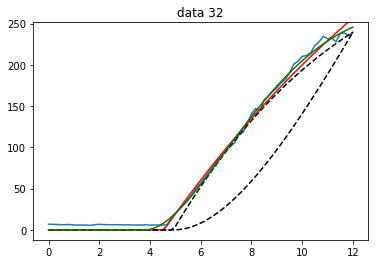

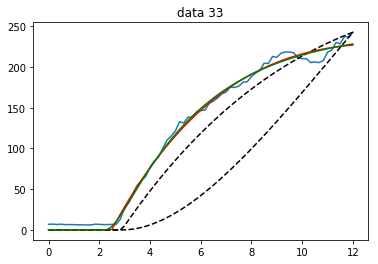

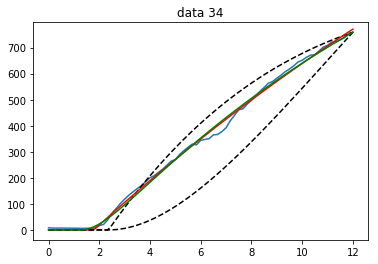

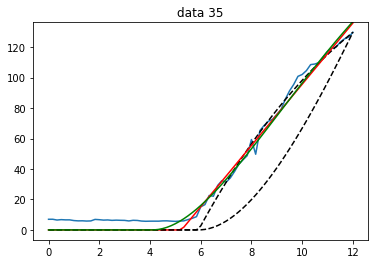

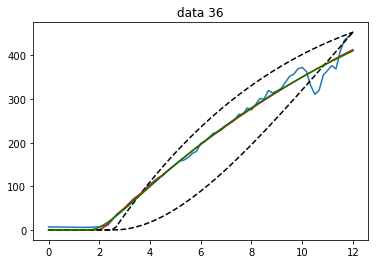

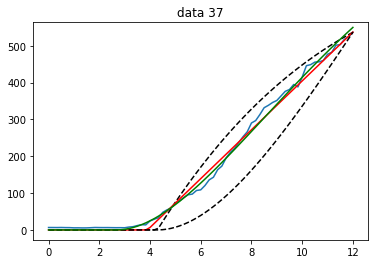

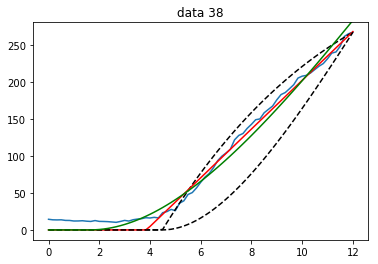

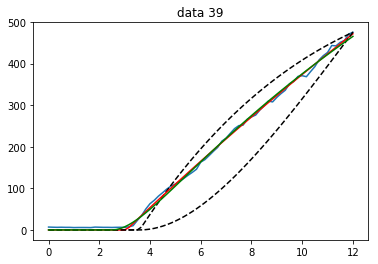

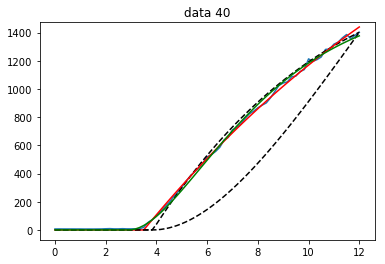

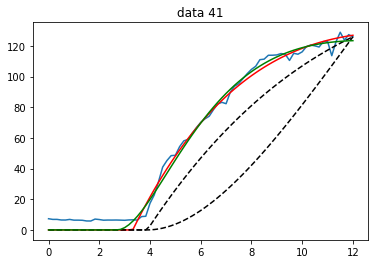

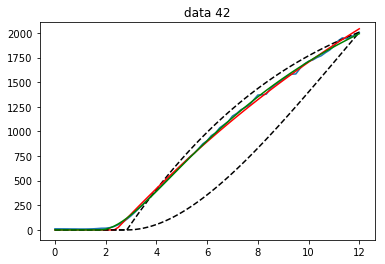

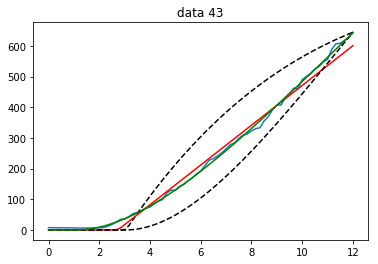

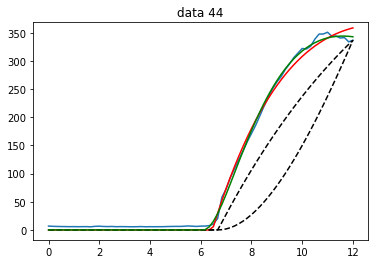

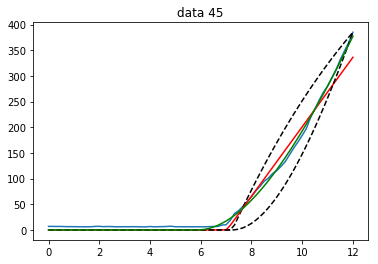

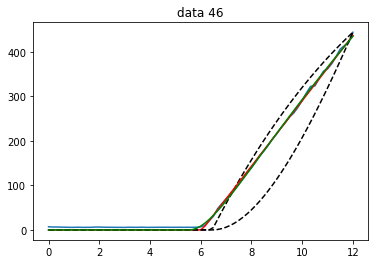

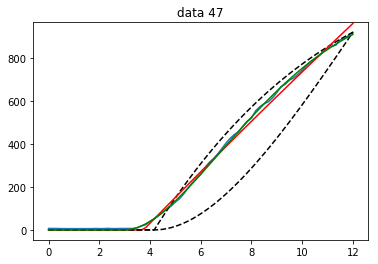

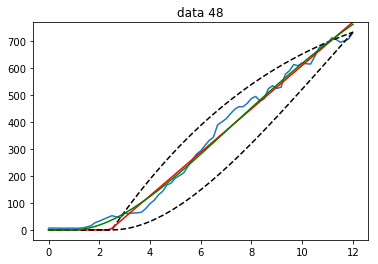

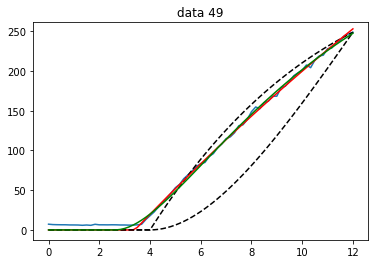

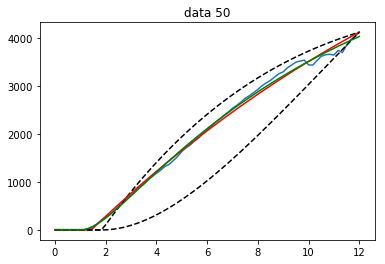

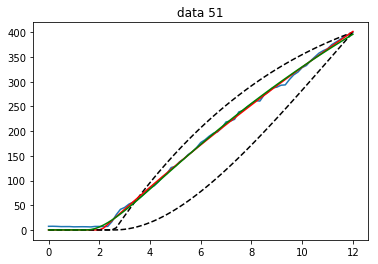

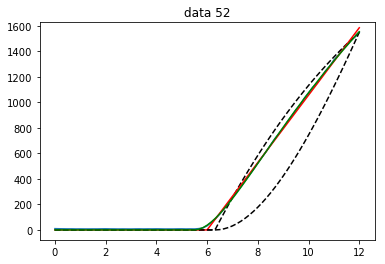

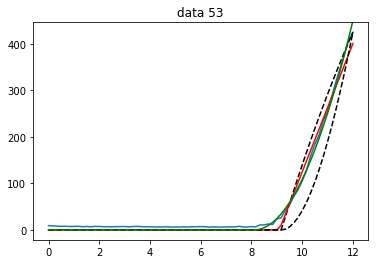

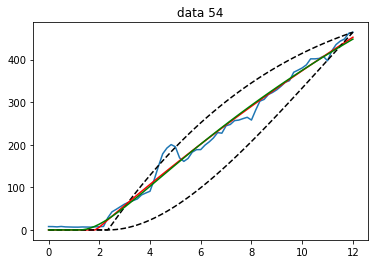

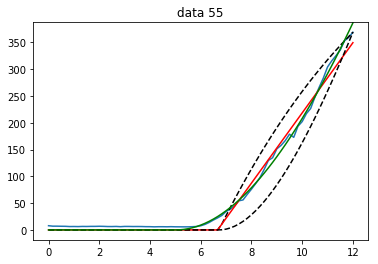

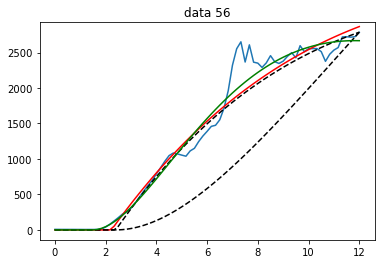

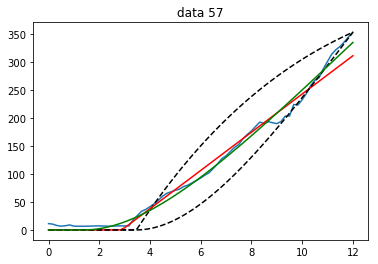

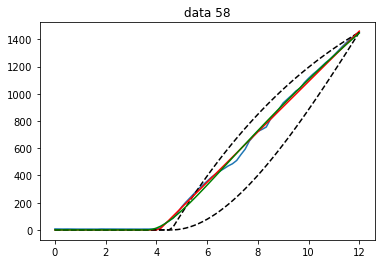

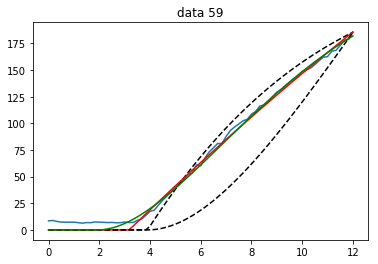

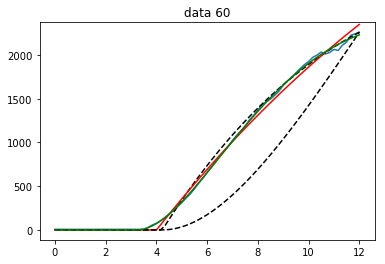

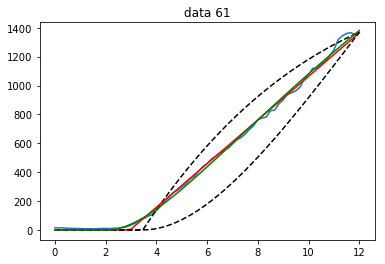

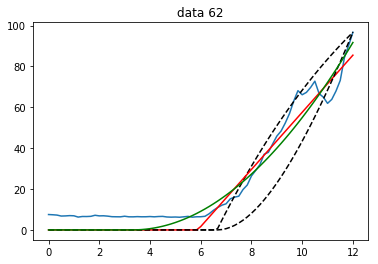

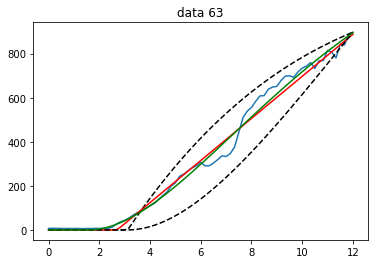

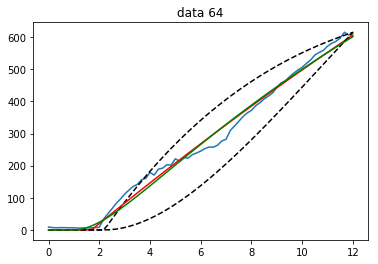

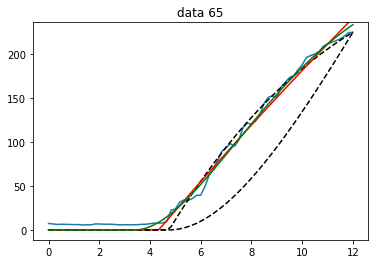

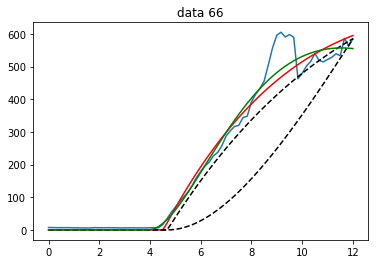

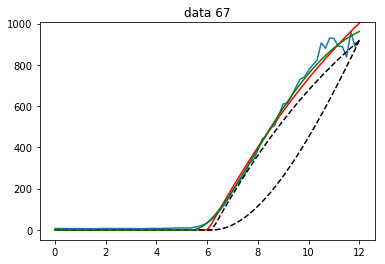

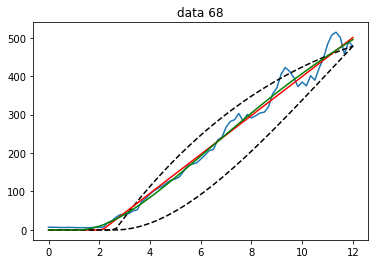

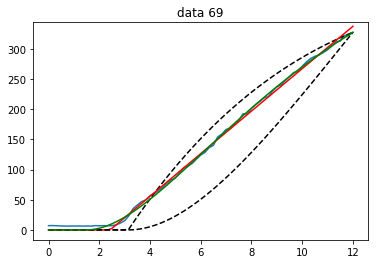

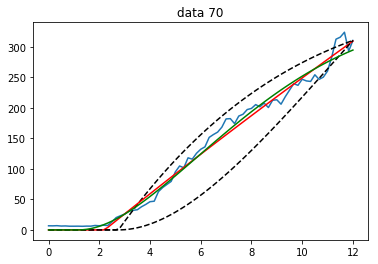

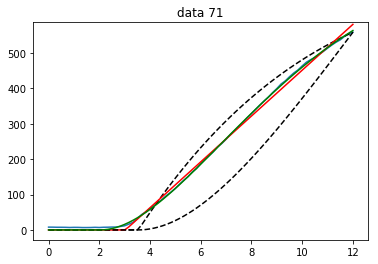

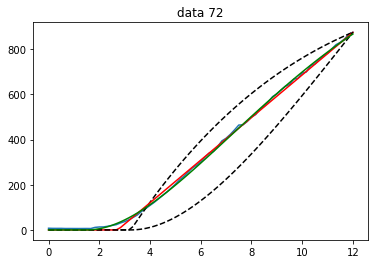

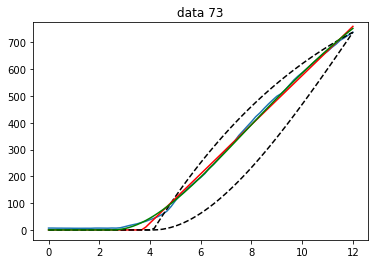

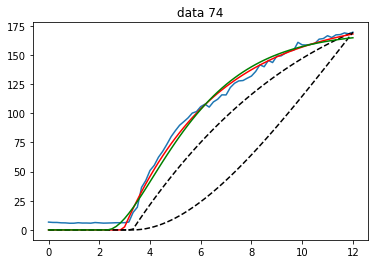

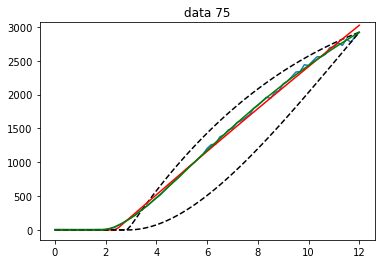

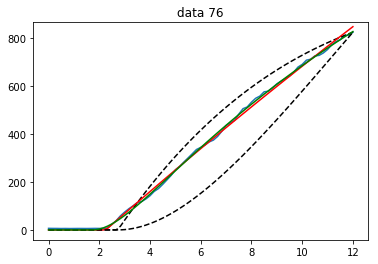

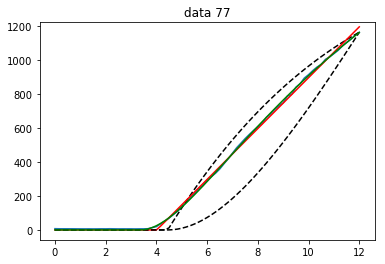

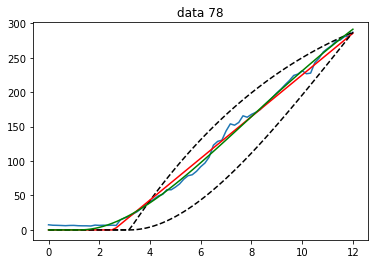

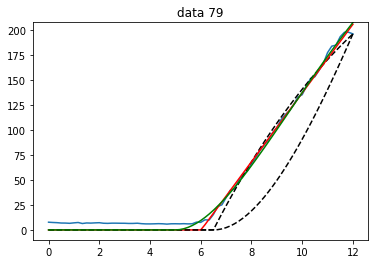

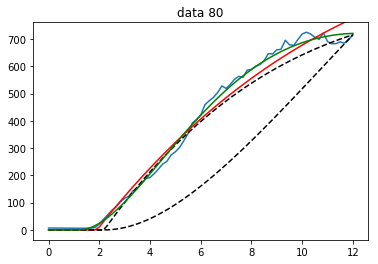

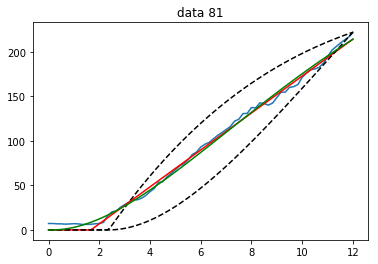

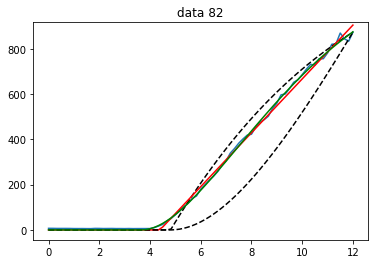

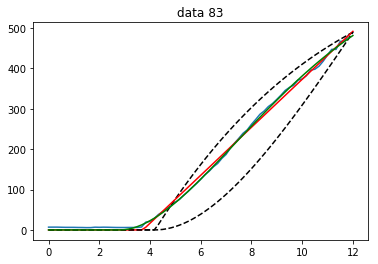

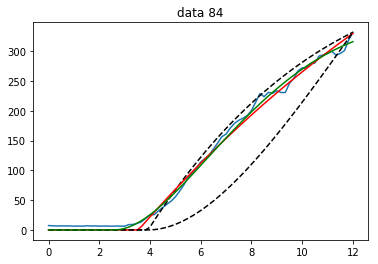

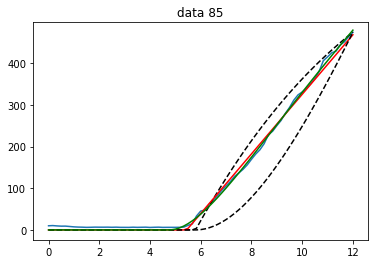

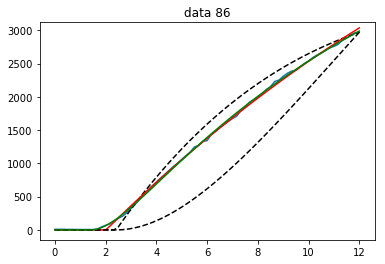

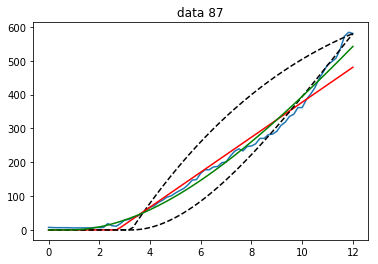

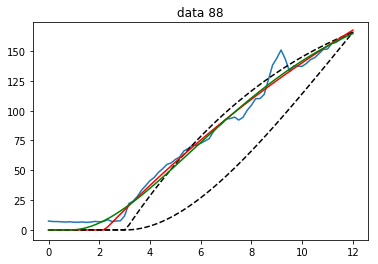

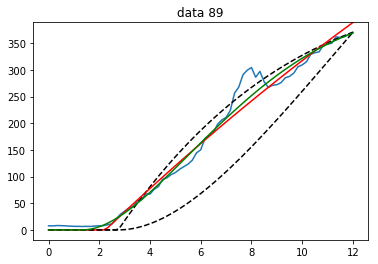

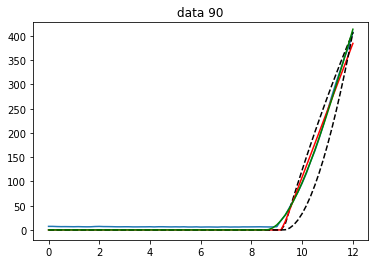

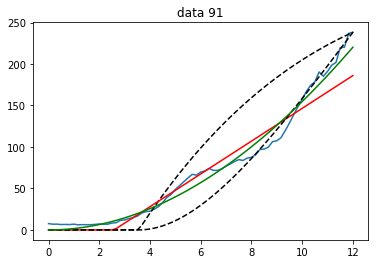

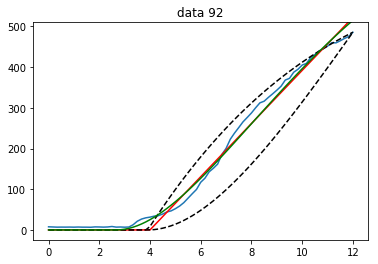

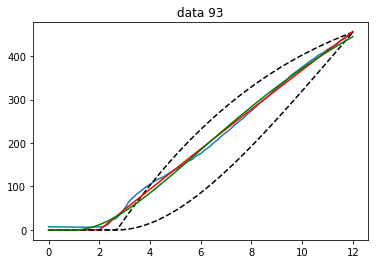

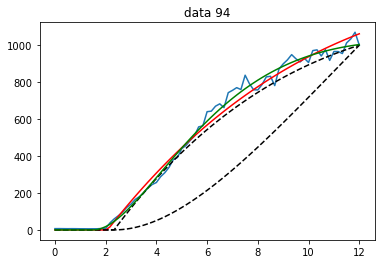

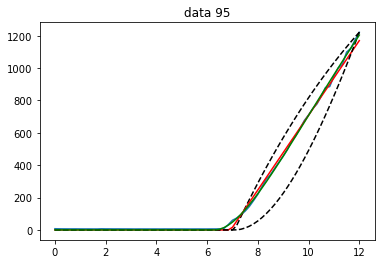

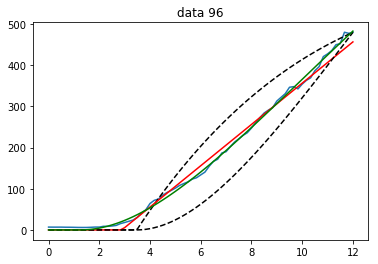

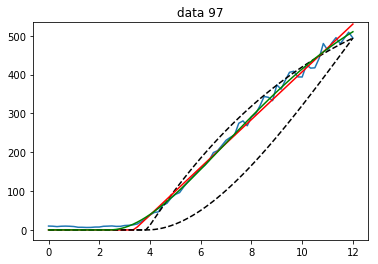

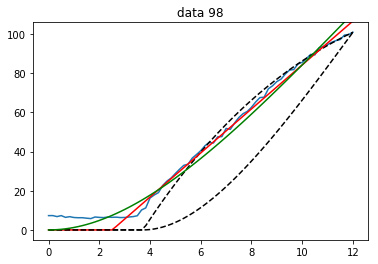

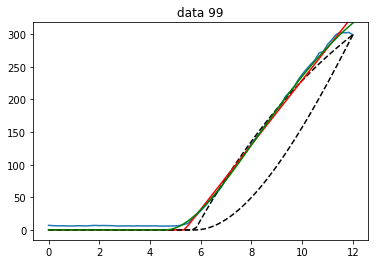

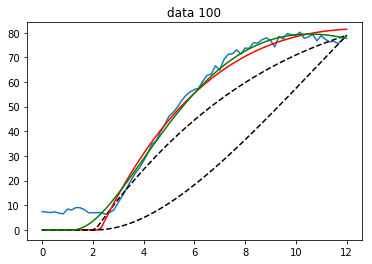

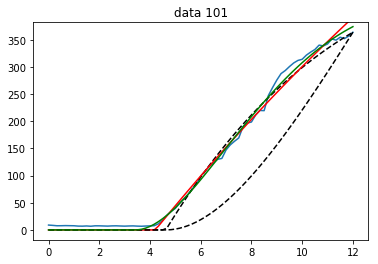

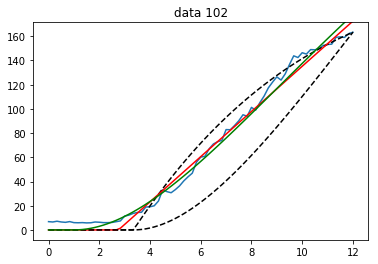

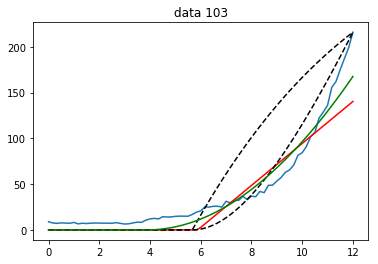

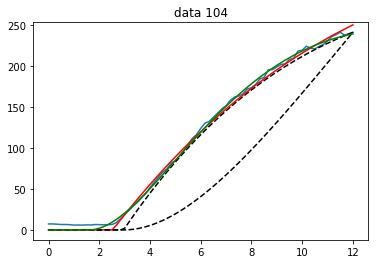

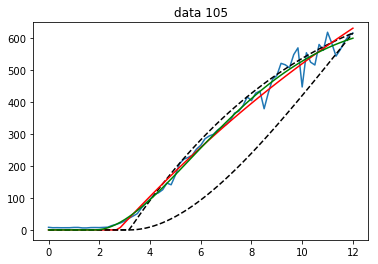

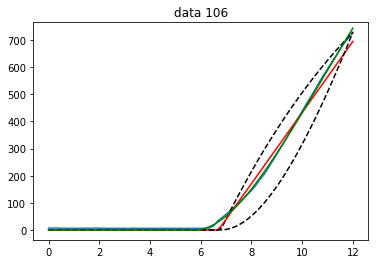

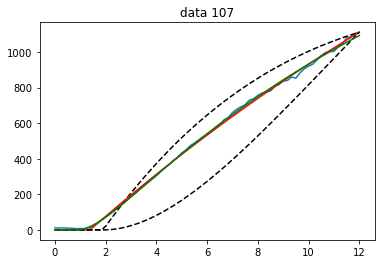

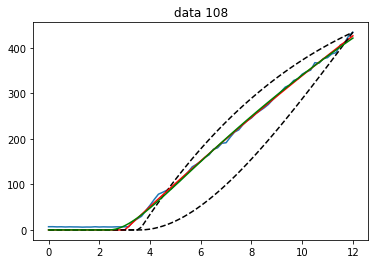

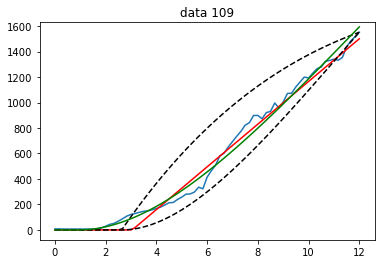

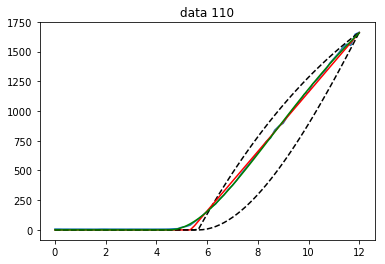

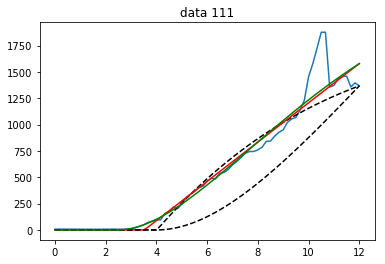

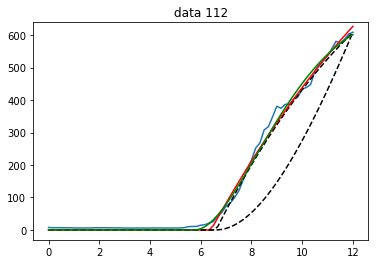

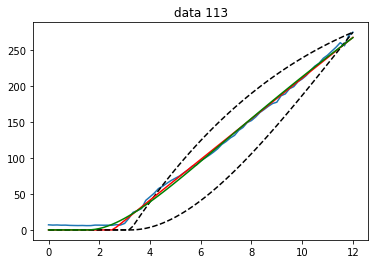

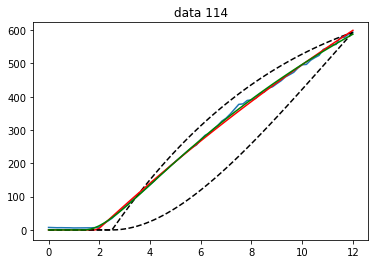

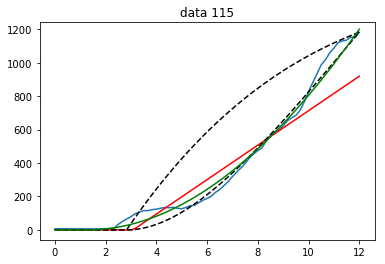

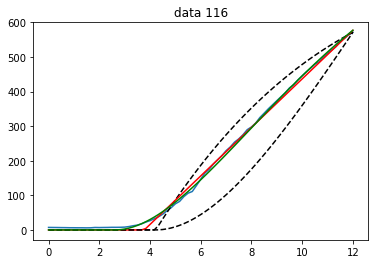

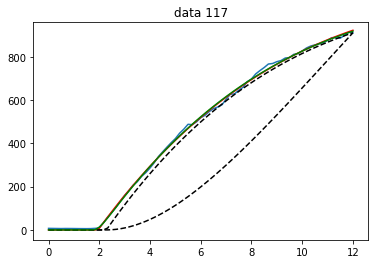

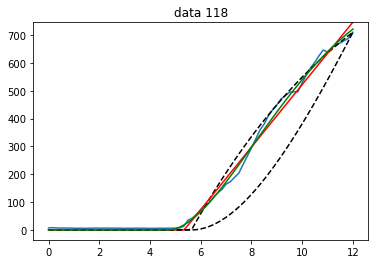

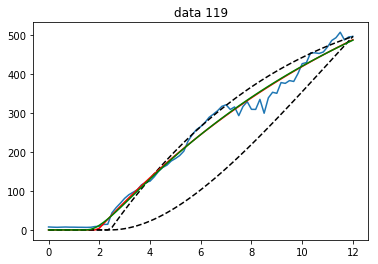

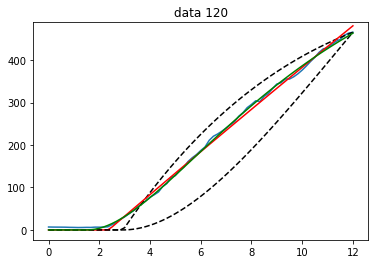

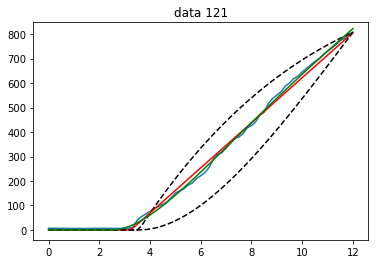

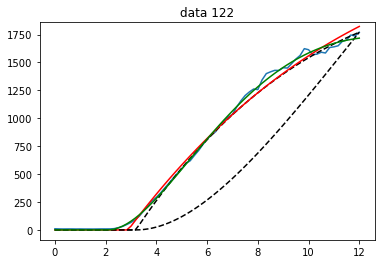

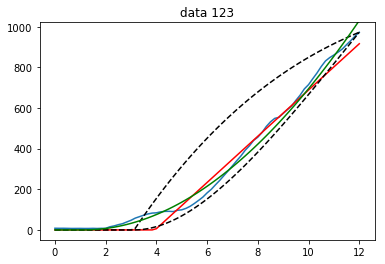

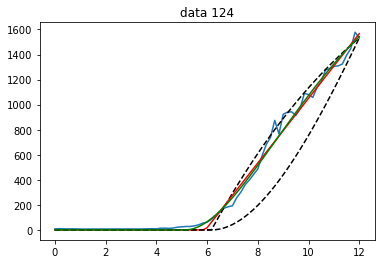

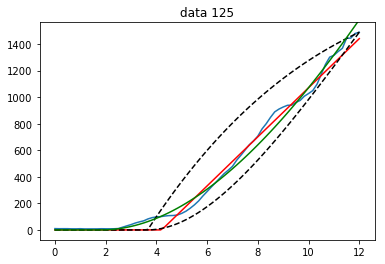

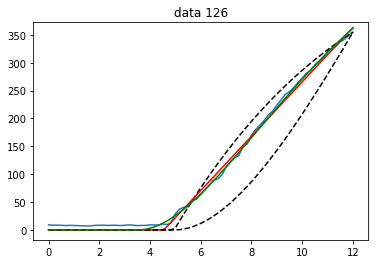

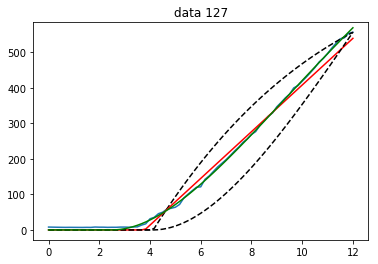

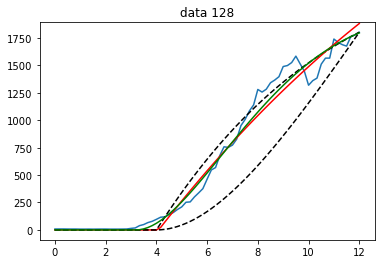

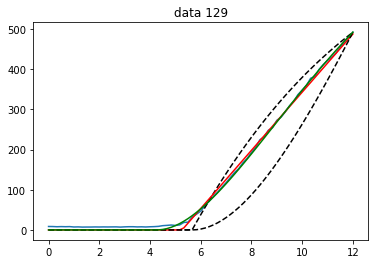

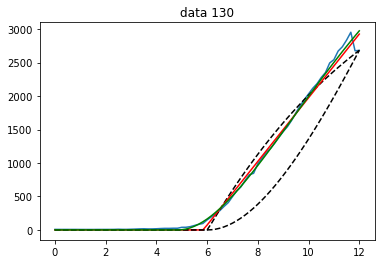

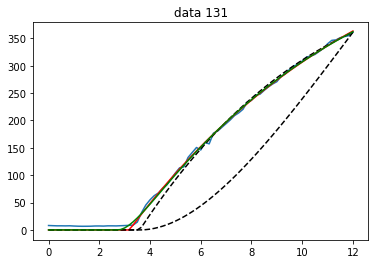

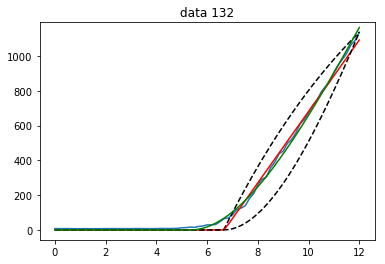

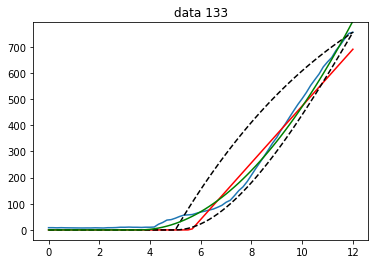

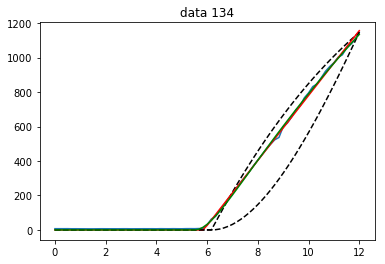

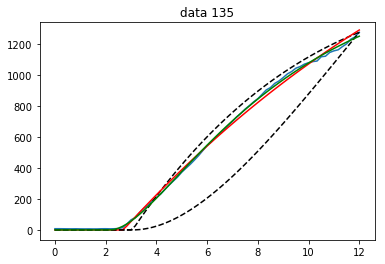

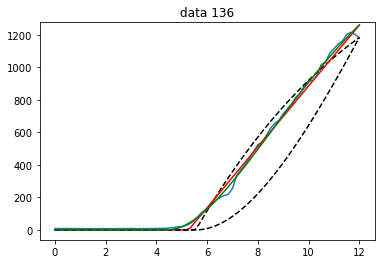

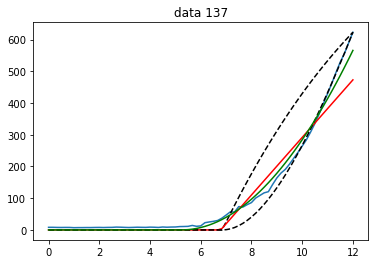

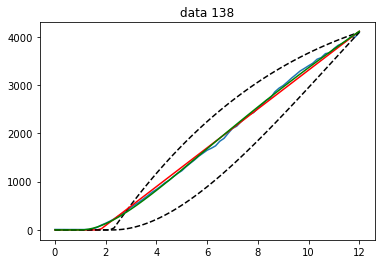

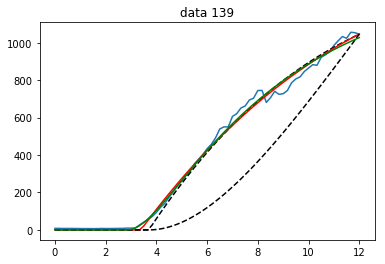

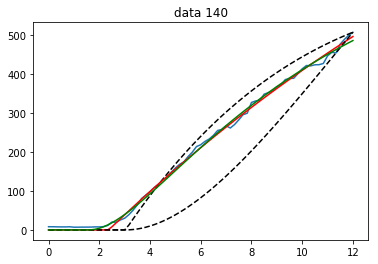

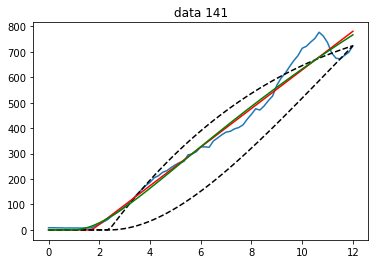

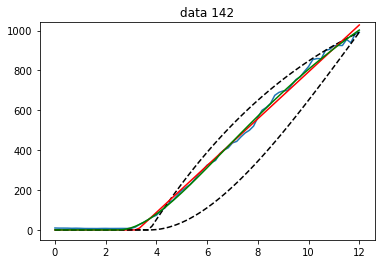

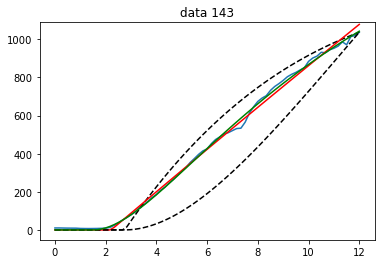

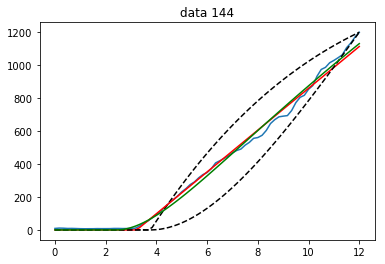

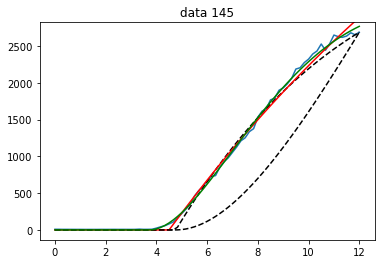

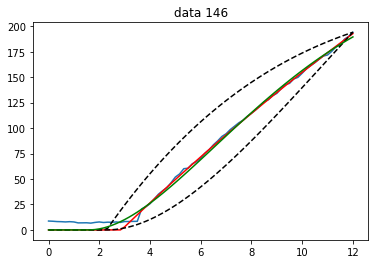

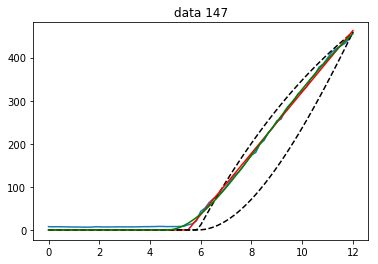

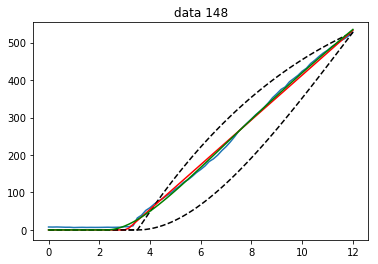

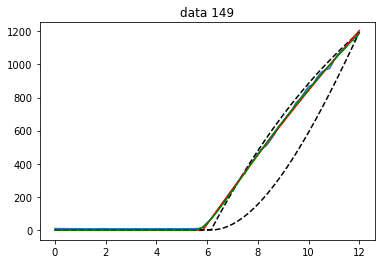

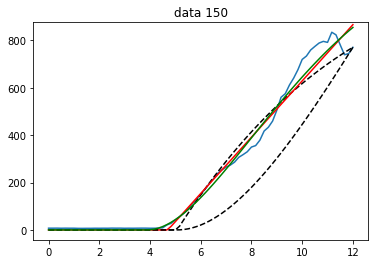

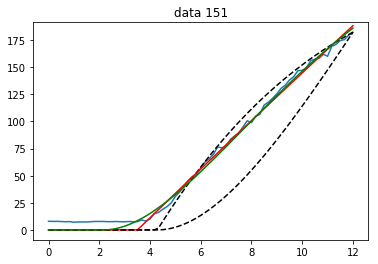

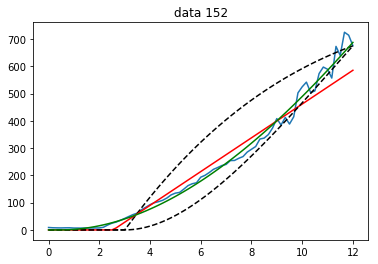

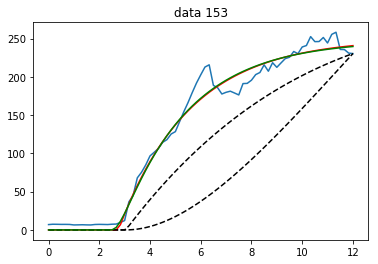

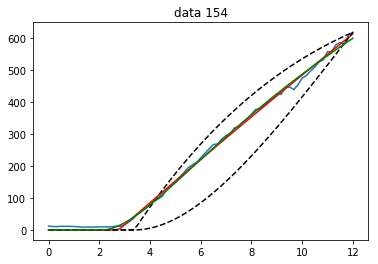

In [7]:
# two stage model
t0_list=[]
ktl_list=[]
delta_list=[]
beta_list=[]
t0_std_list=[]
ktl_std_list=[]
delta_std_list=[]
beta_std_list=[]
red_chi2_list=[]

# three stage model
t0_list3=[]
ktl_list3=[]
km_list3=[]
delta_list3=[]
beta_list3=[]
t0_std_list3=[]
ktl_std_list3=[]
km_std_list3=[]
delta_std_list3=[]
beta_std_list3=[]
red_chi2_list3=[]

for data,i in zip(egfp,range(t0cluster_list.size)):
    sigma = np.sqrt(data)
    time = np.arange(0,data.size)*10/60
    # lets estimate the parameters
    # to estimate t0 we take I_max-I_min and estimate t for which I=I_min+0.1(I_max-Imin)
    # this can be done by interpolation.  The advantage is that the guess for t0 is greater
    # than the actual value - fits seems to converge better
    delta_I=data.max()-data.min()
    t0guess = interp1d(data,time)(data.min()+0.05*delta_I)
    print("data set",i,"t0_guess",t0guess)
    delta_t=time[-1]-t0guess
    
    two=twostage(np.array([delta_t]),0,1,0.07,0.05)
    ktl2=data[-1]/two[0]
    
    three=threestage(np.array([delta_t]),0,1,0.03,0.07,0.05)
    ktl3=data[-1]/three[0]
    
    result2 = twostage_model.fit(data, t=time, t0=t0guess, ktl=ktl2, delta=0.07, beta=0.05, weights=1/sigma)
    result3 = threestage_model.fit(data, t=time, t0=t0guess, ktl=ktl3, km=0.03,delta=0.07, beta=0.05, weights=1/sigma)

    plt.figure()
    plt.title("data "+str(i))
    plt.plot(time,data)
    plt.plot(time,result2.init_fit, 'k--')
    plt.plot(time, result2.best_fit, 'r-')
    plt.plot(time,result3.init_fit, 'k--')
    plt.plot(time, result3.best_fit, 'g-')
    plt.ylim((-0.05*data.max(),data.max()*1.05))
    
    if result2:
        t0_list.append(np.abs(result2.values['t0']))
        ktl_list.append(np.abs(result2.values['ktl']))
        delta_list.append(np.abs(result2.values['delta']))
        beta_list.append(np.abs(result2.values['beta']))
        red_chi2_list.append(result2.redchi)

        t0_std_list.append(result2.covar[0][0])
        ktl_std_list.append(result2.covar[1][1])
        delta_std_list.append(result2.covar[2][2])
        beta_std_list.append(result2.covar[3][3])
    
    if result3:
        t0_list3.append(np.abs(result3.values['t0']))
        ktl_list3.append(np.abs(result3.values['ktl']))
        km_list3.append(np.abs(result3.values['km']))
        delta_list3.append(np.abs(result3.values['delta']))
        beta_list3.append(np.abs(result3.values['beta']))
        red_chi2_list3.append(result3.redchi)

        t0_std_list3.append(result3.covar[0][0])
        ktl_std_list3.append(result3.covar[1][1])
        km_std_list3.append(result3.covar[2][2])
        delta_std_list3.append(result3.covar[3][3])
        beta_std_list3.append(result3.covar[4][4])
    
t0_list=np.array(t0_list)
ktl_list=np.array(ktl_list)
delta_list=np.array(delta_list)
beta_list=np.array(beta_list)
t0_std_list=np.array(t0_std_list)
ktl_std_list=np.array(ktl_std_list)
delta_std_list=np.array(delta_std_list)
beta_std_list=np.array(beta_std_list)

t0_list3=np.array(t0_list3)
ktl_list3=np.array(ktl_list3)
km_list3=np.array(km_list3)
delta_list3=np.array(delta_list3)
beta_list3=np.array(beta_list3)
t0_std_list3=np.array(t0_std_list3)
ktl_std_list3=np.array(ktl_std_list3)
km_std_list3=np.array(km_std_list3)
delta_std_list3=np.array(delta_std_list3)
beta_std_list3=np.array(beta_std_list3)

red_chi2_list=np.array(red_chi2_list)
red_chi2_list3=np.array(red_chi2_list3)


4.84425977322 3.30398773862
4.18587599836 2.37727131367
[ 16.36102849  14.38781258   5.15958106   3.61982577   2.47384125
   1.48768534]
[ 11.03483394   7.83425916   3.73414108   2.53373609   1.90621272
   1.15599082]


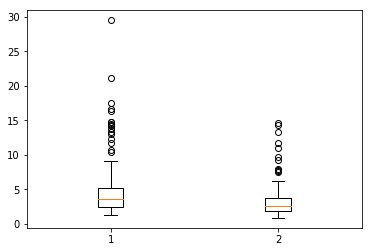

In [8]:
plt.boxplot([red_chi2_list,red_chi2_list3])
print(red_chi2_list.mean(),red_chi2_list3.mean())
print(red_chi2_list.std(),red_chi2_list3.std())
print(np.percentile(red_chi2_list,[97.5,95,75,50,25,2.5]))
print(np.percentile(red_chi2_list3,[97.5,95,75,50,25,2.5]))

In [9]:
print(np.argmax(red_chi2_list),red_chi2_list.max())
print(np.argmax(red_chi2_list3),red_chi2_list3.max())

115 29.4999350472
16 14.6418280424


In [10]:
# cleaning up the data by setting a threshold for redchi2
threshold2 = 150
threshold3 = 150
ktl_list_clean=ktl_list[red_chi2_list<threshold2]
delta_list_clean=delta_list[red_chi2_list<threshold2]
beta_list_clean=beta_list[red_chi2_list<threshold2]
t0_list_clean=t0_list[red_chi2_list<threshold2]
ktl_std_list_clean=ktl_std_list[red_chi2_list<threshold2]
delta_std_list_clean=delta_std_list[red_chi2_list<threshold2]
beta_std_list_clean=beta_std_list[red_chi2_list<threshold2]
t0_std_list_clean=t0_std_list[red_chi2_list<threshold2]

ktl_list3_clean=ktl_list3[red_chi2_list3<threshold3]
km_list3_clean=km_list3[red_chi2_list3<threshold3]
delta_list3_clean=delta_list3[red_chi2_list3<threshold3]
beta_list3_clean=beta_list3[red_chi2_list3<threshold3]
t0_list3_clean=t0_list3[red_chi2_list3<threshold3]
km_std_list3_clean=km_std_list3[red_chi2_list3<threshold3]
ktl_std_list3_clean=ktl_std_list3[red_chi2_list3<threshold3]
delta_std_list3_clean=delta_std_list3[red_chi2_list3<threshold3]
beta_std_list3_clean=beta_std_list3[red_chi2_list3<threshold3]
t0_std_list3_clean=t0_std_list3[red_chi2_list3<threshold3]


In [11]:
print(ktl_list.size,ktl_list_clean.size)
print(ktl_list3.size,ktl_list3_clean.size)

155 155
155 155


123.280530121 4664.47727665


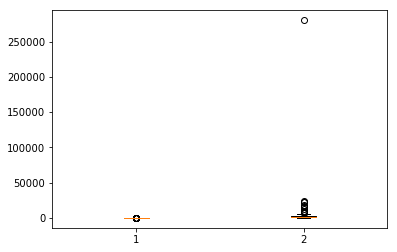

In [12]:
plt.boxplot([ktl_list_clean,ktl_list3_clean])
print(ktl_list_clean.mean(),ktl_list3_clean.mean())

(array([ 154.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  7.74116038e+01,   2.80937856e+04,   5.61101596e+04,
          8.41265336e+04,   1.12142908e+05,   1.40159282e+05,
          1.68175656e+05,   1.96192030e+05,   2.24208404e+05,
          2.52224778e+05,   2.80241151e+05]),
 <a list of 10 Patch objects>)

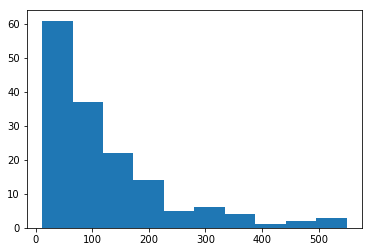

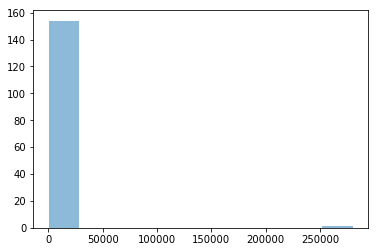

In [13]:
plt.figure()
plt.hist(ktl_list_clean)
plt.figure()
plt.hist(ktl_list3_clean,alpha=0.5)

(array([ 139.,   10.,    2.,    2.,    1.,    0.,    0.,    0.,    0.,    1.]),
 array([ 0.00270624,  0.10248966,  0.20227308,  0.30205651,  0.40183993,
         0.50162335,  0.60140677,  0.7011902 ,  0.80097362,  0.90075704,
         1.00054047]),
 <a list of 10 Patch objects>)

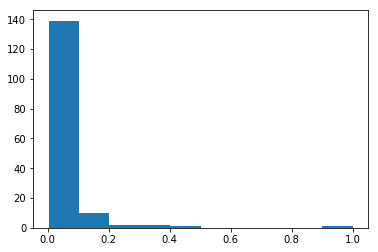

In [14]:
plt.figure()
plt.hist(km_list3_clean)

{'boxes': [<matplotlib.lines.Line2D at 0x12112f0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x121132b38>,
 'fliers': [<matplotlib.lines.Line2D at 0x121138d30>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x121138518>,
 'whiskers': [<matplotlib.lines.Line2D at 0x12112fac8>,
  <matplotlib.lines.Line2D at 0x121143c50>]}

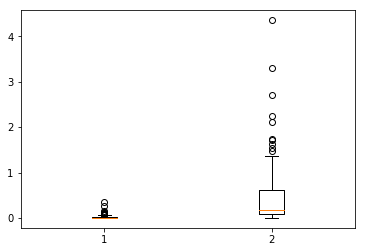

In [15]:
plt.boxplot([delta_list_clean,delta_list3_clean])

0.0203957486037 0.450556444485


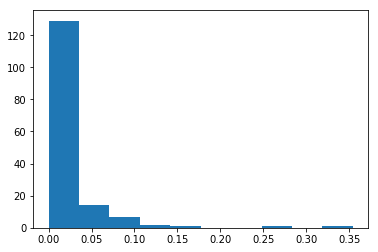

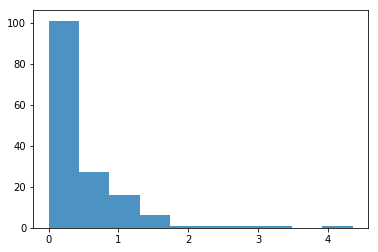

In [16]:
plt.figure()
plt.hist(delta_list_clean)
plt.figure()
plt.hist(delta_list3_clean,alpha=0.8)
print(delta_list_clean.mean(),delta_list3_clean.mean())

{'boxes': [<matplotlib.lines.Line2D at 0x121499978>,
 'caps': [<matplotlib.lines.Line2D at 0x1214fdd30>,
 'fliers': [<matplotlib.lines.Line2D at 0x121507c88>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x121503da0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x121499be0>,
  <matplotlib.lines.Line2D at 0x12150fe48>]}

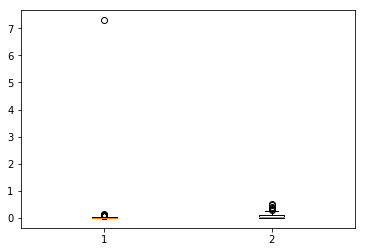

In [17]:
plt.boxplot([beta_list_clean,beta_list3_clean])

(array([ 80.,  26.,  24.,  12.,   7.,   1.,   1.,   2.,   1.,   1.]),
 array([  1.23494993e-08,   5.16698723e-02,   1.03339732e-01,
          1.55009592e-01,   2.06679452e-01,   2.58349312e-01,
          3.10019172e-01,   3.61689032e-01,   4.13358892e-01,
          4.65028752e-01,   5.16698612e-01]),
 <a list of 10 Patch objects>)

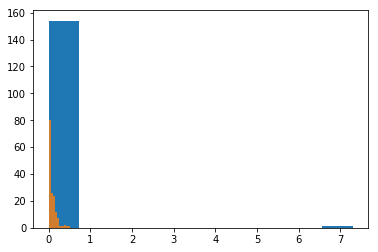

In [18]:
plt.hist(beta_list_clean)
plt.hist(beta_list3_clean,alpha=0.8)

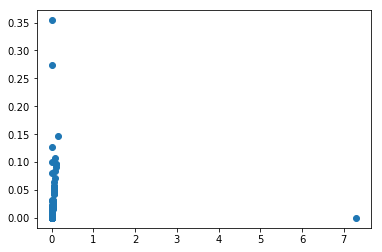

In [19]:
plt.plot(beta_list_clean,delta_list_clean,"o")

{'boxes': [<matplotlib.lines.Line2D at 0x1212aac18>],
 'caps': [<matplotlib.lines.Line2D at 0x12127ea20>,
 'fliers': [<matplotlib.lines.Line2D at 0x1211e0d68>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x121214860>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1212aab38>,
  <matplotlib.lines.Line2D at 0x12127eb70>]}

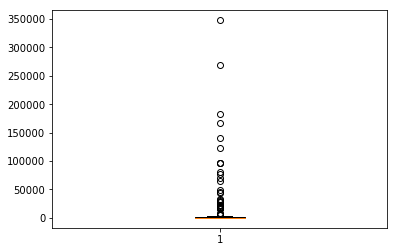

In [20]:
error_delta = delta_std_list_clean/delta_list_clean
plt.boxplot(error_delta)

{'boxes': [<matplotlib.lines.Line2D at 0x12122e5f8>,
 'caps': [<matplotlib.lines.Line2D at 0x120f7fb00>,
 'fliers': [<matplotlib.lines.Line2D at 0x1211fa9e8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12115a5c0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x12122e2e8>,
  <matplotlib.lines.Line2D at 0x120bd8b38>]}

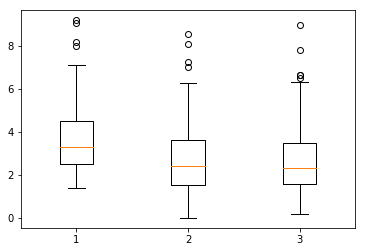

In [21]:
plt.boxplot([t0_list_clean,t0_list3_clean,t0cluster_list])

3.75243469241
2.74907314924
2.62795698925


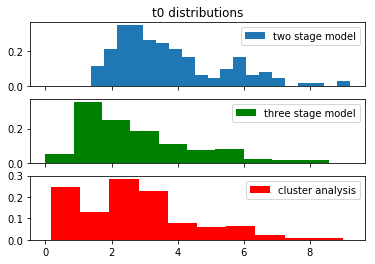

In [22]:
plt.figure()
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(3, sharex=True)
axarr[0].hist(t0_list_clean, bins=20,normed=True,label='two stage model')
axarr[0].set_title('t0 distributions')
axarr[0].legend()
axarr[1].hist(t0_list3_clean,bins=10,color='g',normed=True,label='three stage model')
axarr[1].legend()
axarr[2].hist(t0cluster_list,bins=10,color='r',normed=True,label='cluster analysis')
axarr[2].legend()
print(t0_list_clean.mean())
print(t0_list3_clean.mean())
print(t0cluster_list.mean())

In [23]:
# save data
np.save("k5_t0_two",t0_list_clean)
np.save("k5_t0_three",t0_list3_clean)
np.save("k5_t0_cluster",t0cluster_list)

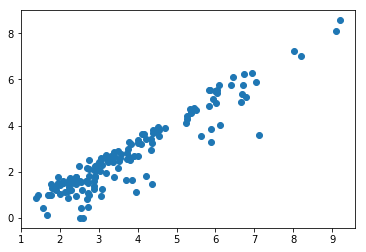

In [24]:
plt.plot(t0_list_clean,t0_list3_clean,"o")